# Load the saved data and process
This is the last step before the Machine Learning training

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## Define a window processing function

# result = slide_window_fft(fft_size, data, fs, overlap_fac)
def slide_window_fft(data, fft_size, fs, overlap_fac):
    data = data.flatten()
    hop_size = np.int32(np.floor(fft_size * (1-overlap_fac)))
    pad_end_size = fft_size          # the last segment can overlap the end of the data array by no more than one window size
    total_segments = np.int32(np.ceil(len(data) / np.float32(hop_size)))
    t_max = len(data) / np.float32(fs)

    window = np.hanning(fft_size)  # our half cosine window
    inner_pad = np.zeros(fft_size) # the zeros which will be used to double each segment size

    proc = np.concatenate((data, np.zeros(pad_end_size)))              # the data to process
    result = np.empty((total_segments, fft_size), dtype=np.float32)    # space to hold the result

    for i in range(total_segments):                      # for each segment
        current_hop = hop_size * i                        # figure out the current segment offset
        segment = proc[current_hop:current_hop+fft_size]  # get the current segment
        windowed = segment * window                       # multiply by the half cosine function
        padded = np.append(windowed, inner_pad)           # add 0s to double the length of the data
        spectrum = np.fft.fft(padded) / fft_size          # take the Fourier Transform and scale by the number of samples
        autopower = np.abs(spectrum * np.conj(spectrum))  # find the autopower spectrum
        result[i, :] = autopower[:fft_size]               # append to the results array
    
    result = 20*np.log10(result)          # scale to db
    return result


In [3]:
npzfile = np.load('CWRU_cleaned.npz')
npzfile.files

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

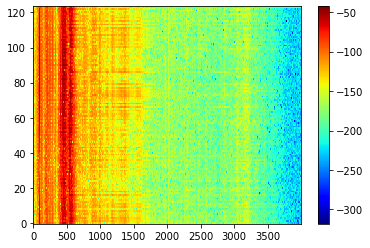

In [20]:
fft_size = 4000
fs = 1/48000
overlap_fac = 0.01

result = slide_window_fft(npzfile['c9'], fft_size, fs, overlap_fac)
img = plt.imshow(result, origin='lower', cmap='jet', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()